## Assignment-07 First Step of using machine learning and models.

### 任务描述

报社等相关的机构，往往会遇到一个问题，就是别人家的机构使用自己的文章但是并没有标明来源。 在本次任务中，我们将解决新华社的文章被抄袭引用的问题。

给定的数据集合中，存在一些新闻预料，该预料是来自新华社，但是其来源并不是新华社，请设计技巧学习模型解决该问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1566105348906&di=ee9a2de91207767364853d4decc6cca3&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_png%2FTicO2kbP6Ao5sCsSQDpehZiczLdC6hDCNvoicjcOCEKX2bLxBc9gVOw28zHyFibfIWq9ceRibP6HDTKReGkr6YyTfQQ%2F640%3Fwx_fmt%3Dpng)

### Step1: 数据分析

请在课程的GitHub中下载数据集，然后使用pandas进行读取。

In [6]:
import pandas as pd

In [7]:
csv_path = '/development/jupyter/datasource/sqlResult_1558435.csv'

In [8]:
content = pd.read_csv(csv_path, encoding='gb18030')

In [9]:
content = content.fillna('')

In [10]:
len(content)

89611

In [11]:
content.head()

,id,author,source,content,feature,title,url
0,89617,,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [197]:
content.iloc[[0, 3], :]

,id,author,source,content,feature,title,url,y
0,89617,,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm,0
3,89614,,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....,1


### Step2: 数据预处理

将pandas中的数据，依据是否是新华社的文章，请改变成新的数据dataframe: <content, y>, 其中，content是文章内容，y是0或者1. 你可能要使用到pandas的dataframe操作。https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [12]:
xinhua_news = content[content['source'] == '新华社']
len(xinhua_news)

78661

In [13]:
# 添加y
content['y'] = content.source.apply(lambda x: 1 if x=='新华社' else 0)

In [14]:
content.head(10)

,id,author,source,content,feature,title,url,y
0,89617,,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm,0
1,89616,,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm,0
2,89615,,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm,0
3,89614,,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....,1
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...,0
5,89612,张怡,中国证券报?中证网,受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",金融股一枝独秀 配置价值犹存,http://www.cs.com.cn/gppd/201706/t20170623_533...,0
6,89611,,威锋网@http://www.feng.com/,虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""21""...",配骁龙660 全面屏鼻祖夏普新机酝酿中,http://www.cnbeta.com/articles/tech/623603.htm,0
7,89610,申玉彬 整理,中国证券报?中证网,沙漠雄鹰：震荡有利消化套牢筹码\r\n 周四开盘上证50在银行券商大蓝筹带动下一度涨近...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",博友早评：震荡有利消化套牢筹码,http://www.cs.com.cn/gppd/201706/t20170623_533...,0
8,89609,李杭_BJS4645,荆楚网-楚天都市报,（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""1600""...",武汉千余警察出动 抓获808名俊男靓女全是诈骗犯,http://news.163.com/17/0614/14/CMT9N8G80001899...,0
9,89608,吴瞬,中国证券报?中证网,6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",纳入MSCI指数 A股长期配置价值提升,http://www.cs.com.cn/gppd/201706/t20170623_533...,0


In [15]:
data = content[['content', 'y']]

In [16]:
len(data[data['y'] == 1])

78661

In [17]:
max_df = len(xinhua_news) / len(content)

In [18]:
max_df

0.8778051801676133

### Step3: 使用tfidf进行文本向量化

参考 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 对

对文本进行向量化

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import jieba
import re

In [25]:
def cut(string): return ' '.join(jieba.cut(string))

In [26]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [27]:
def preprocess_text(text):
    return cut(' '.join(token(text)))

In [28]:
# 处理新闻
news_content = [preprocess_text(n) for n in data['content'].tolist()]

In [30]:
def load_stop_words(path):
    """
    加载停用词
    """
    result = set()
    with open(path, encoding='utf-8') as f:
        for line in f:
            result.add(line.strip())
    return list(result)

In [31]:
# 加载停用词
stop_words = load_stop_words('chinese_stopwords.txt')

In [32]:
len(stop_words)

493

In [71]:
tfidf_model = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b', analyzer='word', stop_words=stop_words)

In [72]:
vectors = tfidf_model.fit_transform(news_content)

In [78]:
vectors

<89611x247859 sparse matrix of type '<class 'numpy.float64'>'
	with 8299194 stored elements in Compressed Sparse Row format>

In [74]:
vectors.shape

(89611, 247859)

In [48]:
vectors[1].toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
from scipy.spatial.distance import cosine

In [76]:
cosine(vectors[1].toarray()[0], vectors[2].toarray()[0])

0.9876989133194972

### Step4: 参考scikit-learning的方法，构建你的第一个机器学习模型

+ 按照课程讲解的内容，把数据集分割为 traning_data, validation_data, test_data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [55]:
from sklearn.model_selection import train_test_split

In [100]:
X = vectors

In [101]:
y = content['y'].tolist()

In [102]:
# 先分70%为训练集
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3,stratify=y)

In [103]:
# 将剩余的30%中70%为测试集，剩下的为验证集
X_test, X_validation, y_test, y_validation = train_test_split(X_rest, y_rest, test_size=0.3,stratify=y_rest)

In [105]:
X_train.shape, X_rest.shape, X_validation.shape, len(y_train), len(y_rest), len(y_validation)

((62727, 247859), (26884, 247859), (8066, 247859), 62727, 26884, 8066)

In [106]:
sum(y_train), sum(y_rest), sum(y_validation)

(55062, 23599, 7080)

+ 参照scikit learning的示例，从构建你的第一个KNN机器学习模型。

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [121]:
neigh.predict(X_test[0])[0], y_test[0]

(1, 1)

### Step5: 在traning_data, validation_data, test_data 上观察其相关metric: recall, precision, f1等， 并解释其含义. 

In [122]:
def predict(X):
    return neigh.predict(X)

In [125]:
y_train_pred = predict(X_train).tolist()

In [126]:
y_test_pred = predict(X_test).tolist()

In [127]:
y_validation_pred = predict(X_validation).tolist()

In [136]:
# 准确率
from sklearn.metrics import accuracy_score
print('accuracy traning_data:', accuracy_score(y_train, y_train_pred))
print('accuracy test_data:', accuracy_score(y_test, y_test_pred))
print('accuracy validation_data:', accuracy_score(y_validation, y_validation_pred))

accuracy traning_data: 0.7825976054968355
accuracy test_data: 0.7159102986502285
accuracy validation_data: 0.7189437143565583


In [137]:
# 对数损失
from sklearn.metrics import log_loss
print('log loss traning_data:', log_loss(y_train, y_train_pred))
print('log loss test_data:', log_loss(y_test, y_test_pred))
print('log loss validation_data:', log_loss(y_validation, y_validation_pred))

log loss traning_data: 7.508814297617824
log loss test_data: 9.812112455642714
log loss validation_data: 9.707341790332434


In [141]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
print('confusion matrix traning_data:', confusion_matrix(y_train, y_train_pred).ravel())
print('confusion matrix test_data:', confusion_matrix(y_test, y_test_pred).ravel())
print('confusion matrix validation_data:', confusion_matrix(y_validation, y_validation_pred).ravel())

confusion matrix traning_data: [ 7539   126 13511 41551]
confusion matrix test_data: [ 2257    42  5304 11215]
confusion matrix validation_data: [ 970   16 2251 4829]


In [143]:
from sklearn.metrics import classification_report
print('classification report traning_data:\n', classification_report(y_train, y_train_pred))
print('classification report test_data:\n', classification_report(y_test, y_test_pred))
print('classification report validation_data:\n', classification_report(y_validation, y_validation_pred))

classification report traning_data:
               precision    recall  f1-score   support

           0       0.36      0.98      0.53      7665
           1       1.00      0.75      0.86     55062

   micro avg       0.78      0.78      0.78     62727
   macro avg       0.68      0.87      0.69     62727
weighted avg       0.92      0.78      0.82     62727

classification report test_data:
               precision    recall  f1-score   support

           0       0.30      0.98      0.46      2299
           1       1.00      0.68      0.81     16519

   micro avg       0.72      0.72      0.72     18818
   macro avg       0.65      0.83      0.63     18818
weighted avg       0.91      0.72      0.76     18818

classification report validation_data:
               precision    recall  f1-score   support

           0       0.30      0.98      0.46       986
           1       1.00      0.68      0.81      7080

   micro avg       0.72      0.72      0.72      8066
   macro avg     

Text(0.5, 1.0, 'Receiver Operating Characteristic, ROC(AUC = 0.83)')

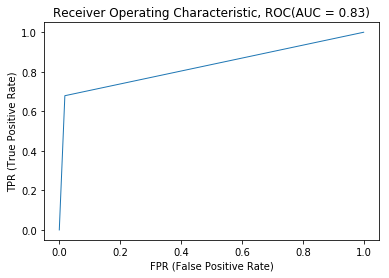

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)  
plt.plot(fpr, tpr, lw=1, label='ROC(area = %0.2f)' % (roc_auc))
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.title("Receiver Operating Characteristic, ROC(AUC = %0.2f)"% (roc_auc))

In [146]:
from sklearn.metrics import roc_auc_score
print('roc_auc_score traning_data:', roc_auc_score(y_train, y_train_pred))
print('roc_auc_score test_data:', roc_auc_score(y_test, y_test_pred))
print('roc_auc_score validation_data:', roc_auc_score(y_validation, y_validation_pred))

roc_auc_score traning_data: 0.8690918531189995
roc_auc_score test_data: 0.8303231880217755
roc_auc_score validation_data: 0.832917483182636


In [147]:
# 均方差
from sklearn.metrics import mean_squared_error
print('mse traning_data:', mean_squared_error(y_train, y_train_pred))
print('mse test_data:', mean_squared_error(y_test, y_test_pred))
print('mse validation_data:', mean_squared_error(y_validation, y_validation_pred))

mse traning_data: 0.2174023945031645
mse test_data: 0.2840897013497715
mse validation_data: 0.2810562856434416


### Step6: 使用 test_data 对其进行新数据的判断, 你有没

In [149]:
accuracy_score(y_test, y_test_pred)

0.7159102986502285

### Step7: 调整不同的参数，观察变化

In [167]:
k = [i for i in range(3, 30, 3)]
acc = []
for i in k:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    neigh.predict(X_test)
    a = accuracy_score(y_test, neigh.predict(X_test).tolist())
    acc.append(a)
    print('i={},acc={}'.format(i, a))

i=3,acc=0.774311829099798
i=6,acc=0.6656924221490063
i=9,acc=0.6219577000743969
i=12,acc=0.55903921777022
i=15,acc=0.5351259432458285
i=18,acc=0.4964395791263684
i=21,acc=0.48070995855032417
i=24,acc=0.45684982463598683
i=27,acc=0.4444149218833032


Text(0, 0.5, 'acc')

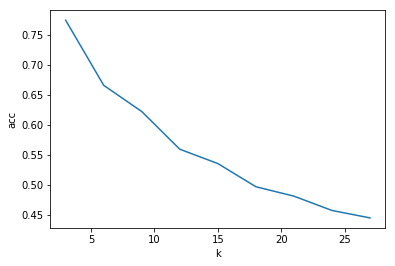

In [168]:
plt.plot(k, acc)
plt.xlabel("k")
plt.ylabel("acc")

### Step8: 不断改变参数，直到性能达到“某个”点。问：“某个”怎么定义？

In [63]:
问题所在的场景中，使所关注的性能指标最佳的模型参数

### Step9: 找出所以预测为 1， 但是实际为 0 的文章。 作为抄袭的候选者。

In [169]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [175]:
y_0_idx = [i for i in range(len(y)) if y[i]==0]

In [177]:
len(y_0_idx)

10950

In [190]:
X[y_0_idx]

<10950x247859 sparse matrix of type '<class 'numpy.float64'>'
	with 1713724 stored elements in Compressed Sparse Row format>

In [191]:
pred = knn.predict(X[y_0_idx]).tolist()

In [192]:
indices = []
for i in range(len(y_0_idx)):
    if pred[i] == 1:
        indices.append(y_0_idx[i])

In [194]:
len(indices)

225

In [198]:
content.iloc[indices, :]

,id,author,source,content,feature,title,url,y
31,89586,,央广网,据中国之声《新闻纵横》报道，针对近日日本媒体披露政府或为首相安倍晋三的好友办学“开绿灯”一事...,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",安倍再陷办学丑闻 日内阁府与文科省调查大相径庭,http://world.huanqiu.com/hot/2017-06/10866219....,0
55,89562,,央广网,央广网贵阳6月19日消息（记者王珩 贵州台记者熊瑛）贵州省招生考试院消息，贵州省2017年高...,"{""type"":""国内新闻"",""site"":""环球"",""commentNum"":""0"",""j...",贵州省今年高考计划招生36.3万人,http://china.huanqiu.com/hot/2017-06/10866408....,0
63,89554,,人民日报,2017年上海国际电影电视节，包括6月12日至16日举办的第二十三届上海电视节和6月17日至...,"{""type"":""国内新闻"",""site"":""环球"",""commentNum"":""0"",""j...",聚焦上海国际电影节：“一带一路”，照耀光影世界,http://china.huanqiu.com/hot/2017-06/10866419....,0
78,89539,,央广网,央广网合肥6月19日消息（记者王利）6月19日上午6时，由公安部消防局组织的中部地区跨区域地...,"{""type"":""国内新闻"",""site"":""环球"",""commentNum"":""0"",""j...",中部地区跨区域地震救援实战拉动演练全面启动,http://china.huanqiu.com/hot/2017-06/10866429....,0
98,89519,,中国新闻网,中新社吉隆坡6月23日电 (赵胜玉 张淼)中国浙江吉利控股集团23日在吉隆坡与马来西亚DRB...,"{""type"":""国际财经"",""site"":""参考消息"",""commentNum"":""0"",...",吉利控股集团与马来西亚DRB-HICOM集团签署最终协议,http://www.cankaoxiaoxi.com/finance/20170623/2...,0
115,89502,,中国网财经,中国网财经6月23日讯 今日，中国保监会副主席黄洪在国务院政策例行吹风会上表示，我们国家在上...,"{""type"":""中国财经"",""site"":""参考消息"",""commentNum"":""0"",...","黄洪:我国养老保障体系距离""多层次、可持续""还有一定差距",http://www.cankaoxiaoxi.com/finance/20170623/2...,0
124,89493,,凤凰体育,佩工或离开华夏幸福\r\n北京时间6月16日，英国媒体《天空体育》消息称，水晶宫换帅盯上了中...,"{""type"":""体育"",""site"":""凤凰"",""commentNum"":""0"",""joi...",权威媒体曝英超球会洽谈佩工 智利工程师或离开华夏,http://sports.ifeng.com/a/20170616/51262773_0....,0
126,89491,荀建国_NN7379,环球时报-环球网,（原标题：伊朗和俄罗斯向卡塔尔提出援助 卡塔尔：暂时还不需要）\r\n【环球网综合报道】据俄...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""1273""...",伊朗俄罗斯向卡塔尔提出援助 卡塔尔:暂时不需要,http://news.163.com/17/0612/09/CMNKKI87000187V...,0
153,89464,,中国经济周刊,文章导读： 实名制真能解决无人机“黑飞”问题？实名制后，无人机行业还需要如何规范？国际上...,"{""type"":""科技"",""site"":""新浪"",""commentNum"":"" 1"",""jo...",无人机“黑飞”频发：实名制后如何破解监管难？,http://tech.sina.com.cn/it/2017-06-20/doc-ifyh...,0
164,89453,,凤凰体育,马龙轻松夺冠\r\n凤凰体育讯北京时间6月18日，国际乒联日本公开赛男单决赛进行，马龙4-1...,"{""type"":""体育"",""site"":""凤凰"",""commentNum"":""0"",""joi...",马龙4比1击败樊振东 生涯首次获日乒赛冠军,http://sports.ifeng.com/a/20170618/51272858_0....,0


### Step10： 总结该过程，什么是数据思维？什么是机器学习思维？

In [ ]:
数据思维是以数据为出发点，研究数据分布规律，人工确定模型参数，获得输出结果。机器学习思维是以模型为出发点，将数据与结果作为输入，输出模型参数

### (Optional)使用第4课讲解的 edit distance，在涉嫌抄袭的文章中，找到其重复的文字与被修改过的文字。 

### Step11: 利用第8课讲述的新模型，进行操作，感受其中不同的参数、模型对性能的影响。

In [164]:
# svm
from sklearn.svm import SVC

In [199]:
svm_rbf = SVC(gamma='auto')
svm_rbf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [200]:
svm_rbf_pred = svm_rbf.predict(X_test).tolist()

In [202]:
accuracy_score(y_test, svm_rbf_pred)

0.8778297374853863

In [203]:
svm_linear = SVC(gamma='auto', kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [204]:
svm_linear_pred = svm_linear.predict(X_test).tolist()

In [205]:
accuracy_score(y_test, svm_linear_pred)

0.9977680943777234

In [206]:
svm_poly = SVC(gamma='auto', kernel='poly')
svm_poly.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [207]:
svm_poly_pred = svm_poly.predict(X_test).tolist()

In [208]:
accuracy_score(y_test, svm_poly_pred)

0.8778297374853863

In [209]:
svm_sigmoid = SVC(gamma='auto', kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [210]:
svm_sigmoid_pred = svm_sigmoid.predict(X_test).tolist()

In [211]:
accuracy_score(y_test, svm_sigmoid_pred)

0.8778297374853863

In [217]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression

In [218]:
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [219]:
lr_pred = lr.predict(X_test).tolist()

In [220]:
accuracy_score(y_test, lr_pred)

0.9970241258369646

In [221]:
# 朴素贝叶斯分类
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train.toarray(), y_train)

In [ ]:
nb_pred = nb.predict(X_test).tolist()

In [ ]:
accuracy_score(y_test, nb_pred)